# Benchmarking Our Algorithm against others

In [1]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph

from panav.sequential import sequential_HybridSIPP

from panav.viz import draw_hybrid



from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

In [ ]:

bloating_r = 0.5
vmax = 1.0

N = 10
limits = [(-10,10),(-10,10)] 
n_tunnel = 1

TIMEOUT = 100 # timeout



env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = N)

HG = HybridGraph(env,bloating_r)

/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


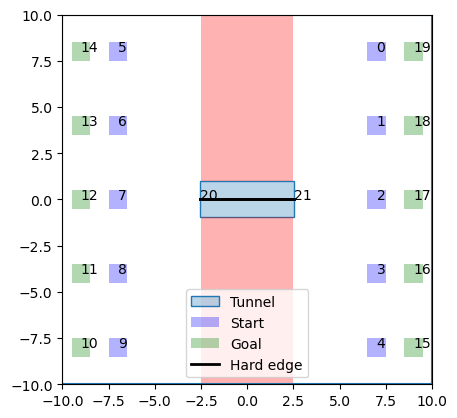

In [ ]:
draw_hybrid(HG)

In [ ]:
continuous_plans = sequential_HybridSIPP(HG)

0
1


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


2
MILP low-level encounters infeasibility.
3
MILP low-level encounters infeasibility.
4
MILP low-level encounters infeasibility.
5
MILP low-level encounters infeasibility.
6
MILP low-level encounters infeasibility.
7
MILP low-level encounters infeasibility.
8
MILP low-level encounters infeasibility.
9
MILP low-level encounters infeasibility.


In [ ]:
from matplotlib import pyplot as plt
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
from matplotlib import rcParams

plans = continuous_plans

exec_tau = 1.0
dt = exec_tau * 0.25
pos_to_ani = []
for cp in plans:
    _,xs = interpolate_positions(*cp,dt)
    pos_to_ani.append(xs)


rcParams['animation.embed_limit'] = 2**128

anim = animation(env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 